In [1]:
NAME = "Robina Shaheen"
COLLABORATORS = ""

<img style="float: left;" src="earth-lab-logo-rgb.png" width="150" height="150" />

# Earth Analytics Education

# Boulder Precipitation (1948-2013) and Stream Discharge (1986-2013) for Boulder Creek, Boulder, CO.
## Time series data workflow 
1. Import packages and modules 
2. Import datetime conversion tools beteween panda and matplotlib for time series analysis
3. Download data from the EarthPy using "colorado-flood" key
4. Set working directory to "earth-analytics" 
5. Define paths to download data files from data folder 'colorado-flood'
6. Import data into dataframes using appropriate functions(date-parser, indexing, remove missing values)
    * Boulder precipitation data  1984-2013
    * Boulder streams discharge data 1986-2013
7. view nature and type of data 
8. Resample data for daily total, monthly maximum and toatl monthly precipiation and discharge 
9. Plot data to view anomaly in monthly precipitation and discharge fluxes.
10. discuss plots and conclusions.

PS: To complete assignment 13, following chapters were reviewed. 
* Time series data <a href="https://www.earthdatascience.org/courses/use-data-open-source-python/use-time-series-data-in-python/date-time-types-in-pandas-python//" target="_blank">Time Series Data in Python</a> online textbook, which covers writing Date, time functions in Python. 
* General python commands <a href="https://www.earthdatascience.org/courses/intro-to-earth-data-science//" target="_blank">Intro to Earth Data Science online textbook</a> 
* Earthpy functions <a href="https://earthpy.readthedocs.io/en/latest/earthpy-data-subsets.html#colorado-flood//" target="_blank">EarthPy User Guide</a>.
* Adherence to PEP 8 standards <a href="https://www.earthdatascience.org/courses/use-data-open-source-python/use-time-series-data-in-python/date-time-types-in-pandas-python//" target="_blank">online textbook page on PEP 8 </a>.

In [2]:
# Core imports needed for grading
import matplotcheck.notebook as nb
import matplotcheck.timeseries as ts

## Import Python Packages

In the cells below packages/modules were imported needed to:
* create plots 
* set  working directory
* download data using earthpy functions
<a href="https://earthpy.readthedocs.io/en/latest/earthpy-data-subsets.html#colorado-flood//" target="_blank">EarthPy </a>
* work with pandaframes

In [3]:
# Import packages/ modules
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import earthpy as et
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import seaborn as sns
import datetime
from scipy.stats import linregress, stats
from textwrap import wrap

# Handle date time conversions between pandas and matplotlib
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Use white grid plot background from seaborn
sns.set(font_scale=1.5, style="whitegrid")

In [4]:
# Conditional statement to check and set working directory. 
ea_path = os.path.join(et.io.HOME, 'earth-analytics')

if os.path.exists(ea_path):
    os.chdir(ea_path)
    print("working directory is set to earth-analytics") 
else:     
    print("This path does not exist")

working directory is set to earth-analytics


In [5]:
# all_sites contain path to both sites 
base_path = os.path.join(ea_path, "data","SD_2014_aq_data")
base_path

'C:\\Users\\bina_\\earth-analytics\\data\\SD_2014_aq_data'

In [6]:
os.listdir()

['.git',
 '.ipynb_checkpoints',
 'data',
 'earth-analytics-class notes_019',
 'earth-analytics-python-env',
 'earth-lab-logo-rgb.png',
 'environment.yml',
 'git',
 'git-repos']

In [25]:
# Files to download for further analysis
# 805333-precip-daily-1948-2013.csv in the precipitation subdirectory
# 06730200-discharge-daily-1986-2013.csv in the discharge subdirectory
# Define relative path to file with daily precip total

file_path1 = os.path.join("data","SD_2014_aq_data",                         
                         "daily_TEMP_2014.csv")
file_path2 = os.path.join("data", "SD_2014_aq_data",
                         "daily_RH_DP_2014.csv")
file_path3 = os.path.join("data", "SD_2014_aq_data",
                         "daily_PRESS_2014.csv")
file_path4 = os.path.join("data", "SD_2014_aq_data",
                         "daily_WIND_2014.csv")
file_path4

# To check if path is created

os.path.exists(file_path4)

True

In [26]:
# import into dataframe

ca_temp_2014_df = pd.read_csv(file_path1, parse_dates=['Date Local'],
                              index_col=['Date Local'])
ca_temp_2014_df.head(2)
ca_RH_2014_df = pd.read_csv(file_path2,parse_dates=['Date Local'],
                                index_col=['Date Local'])
ca_pres_2014_df = pd.read_csv(file_path3,parse_dates= ['Date Local'],
                                index_col=['Date Local'])

ca_wind_2014_df = pd.read_csv(file_path4,parse_dates=['Date Local'],
                                index_col=['Date Local'])
ca_pres_2014_df.head(2)

,State Code,County Code,Site Num,Parameter Code,POC,Latitude,Longitude,Datum,Parameter Name,Sample Duration,...,AQI,Method Code,Method Name,Local Site Name,Address,State Name,County Name,City Name,CBSA Name,Date of Last Change
Date Local,,,,,,,,,,,,,,,,,,,,,
2014-01-01,1,73,23,64101,1,33.553056,-86.815,WGS84,Barometric pressure,1 HOUR,...,NaN,14,INSTRUMENTAL - BAROMETRIC SENSOR,North Birmingham,"NO. B'HAM,SOU R.R., 3009 28TH ST. NO.",Alabama,Jefferson,Birmingham,"Birmingham-Hoover, AL",2/2/2015
2014-01-02,1,73,23,64101,1,33.553056,-86.815,WGS84,Barometric pressure,1 HOUR,...,NaN,14,INSTRUMENTAL - BAROMETRIC SENSOR,North Birmingham,"NO. B'HAM,SOU R.R., 3009 28TH ST. NO.",Alabama,Jefferson,Birmingham,"Birmingham-Hoover, AL",2/2/2015


In [27]:
sd_county_temp = ca_temp_2014_df[ca_temp_2014_df["County Name"] =='San Diego']
sd_county_RH = ca_RH_2014_df[ca_RH_2014_df["County Name"] =='San Diego']
sd_county_pres = ca_pres_2014_df[ca_pres_2014_df["County Name"] =='San Diego']
sd_county_wind = ca_wind_2014_df[ca_wind_2014_df["County Name"] =='San Diego']

sd_county_wind.head(3)

,State Code,County Code,Site Num,Parameter Code,POC,Latitude,Longitude,Datum,Parameter Name,Sample Duration,...,AQI,Method Code,Method Name,Local Site Name,Address,State Name,County Name,City Name,CBSA Name,Date of Last Change
Date Local,,,,,,,,,,,,,,,,,,,,,
2014-01-01,6,73,1,61103,1,32.631231,-117.059075,WGS84,Wind Speed - Resultant,1 HOUR,...,NaN,20,INSTRUMENTAL - VECTOR SUMMATION,Chula Vista,"80 E. 'J' ST., CHULA VISTA",California,San Diego,Chula Vista,"San Diego-Carlsbad, CA",3/25/2015
2014-01-02,6,73,1,61103,1,32.631231,-117.059075,WGS84,Wind Speed - Resultant,1 HOUR,...,NaN,20,INSTRUMENTAL - VECTOR SUMMATION,Chula Vista,"80 E. 'J' ST., CHULA VISTA",California,San Diego,Chula Vista,"San Diego-Carlsbad, CA",3/25/2015
2014-01-03,6,73,1,61103,1,32.631231,-117.059075,WGS84,Wind Speed - Resultant,1 HOUR,...,NaN,20,INSTRUMENTAL - VECTOR SUMMATION,Chula Vista,"80 E. 'J' ST., CHULA VISTA",California,San Diego,Chula Vista,"San Diego-Carlsbad, CA",3/25/2015


In [30]:
sd_county_temp.columns
sd_county_RH.columns
sd_county_pres.columns
sd_county_wind.columns


Index(['State Code', 'County Code', 'Site Num', 'Parameter Code', 'POC',
       'Latitude', 'Longitude', 'Datum', 'Parameter Name', 'Sample Duration',
       'Pollutant Standard', 'Units of Measure', 'Event Type',
       'Observation Count', 'Observation Percent', 'Arithmetic Mean',
       '1st Max Value', '1st Max Hour', 'AQI', 'Method Code', 'Method Name',
       'Local Site Name', 'Address', 'State Name', 'County Name', 'City Name',
       'CBSA Name', 'Date of Last Change'],
      dtype='object')

In [31]:
sd_county_temp['City Name'].unique()

array(['Chula Vista', 'El Cajon', 'Escondido', 'Alpine',
       'Camp Pendleton South', 'San Diego', 'Otay Mesa'], dtype=object)

In [ ]:

# sd_temp = sd_temp.rename(columns={'Date Local': 'Date', 'Arithmetic Mean': 'Mean T (oF)'})

# sd_RH = sd_RH.rename(columns={'Date Local': 'Date', 'Arithmetic Mean': 'RH (%)'})

# sd_pres = sd_pres.rename(columns={'Date Local': 'Date', 'Arithmetic Mean': 'P (mb)'})


In [32]:
sd_mean_temp = pd.DataFrame(sd_county_temp.groupby(['Date Local'
                           ]).mean()["Arithmetic Mean"])#.reset_index()
sd_mean_RH = pd.DataFrame(sd_county_RH.groupby(['Date Local'
                          ]).mean()["Arithmetic Mean"])#.reset_index()
sd_mean_pres = pd.DataFrame(sd_county_pres.groupby(['Date Local'
                           ]).mean()["Arithmetic Mean"])#.reset_index()
sd_mean_wind = pd.DataFrame(sd_county_wind.groupby(['Date Local'
                           ]).mean()["Arithmetic Mean"])#.reset_index()

sd_mean_wind.tail(2)

,Arithmetic Mean
Date Local,
2014-12-30,90.266711
2014-12-31,72.642634


In [20]:
# sd_temp = sd_mean_temp[['Date Local', 'Arithmetic Mean']]
# sd_temp = sd_temp.rename(columns={'Date Local': 'Date', 'Arithmetic Mean': 'Mean T (oF)'})
# sd_RH = sd_mean_RH[['Date Local', 'Arithmetic Mean']]
# sd_RH = sd_RH.rename(columns={'Date Local': 'Date', 'Arithmetic Mean': 'RH (%)'})
# sd_pres = sd_mean_pres[['Date Local', 'Arithmetic Mean']]
# sd_pres = sd_pres.rename(columns={'Date Local': 'Date', 'Arithmetic Mean': 'P (mb)'})

# sd_pres.head()

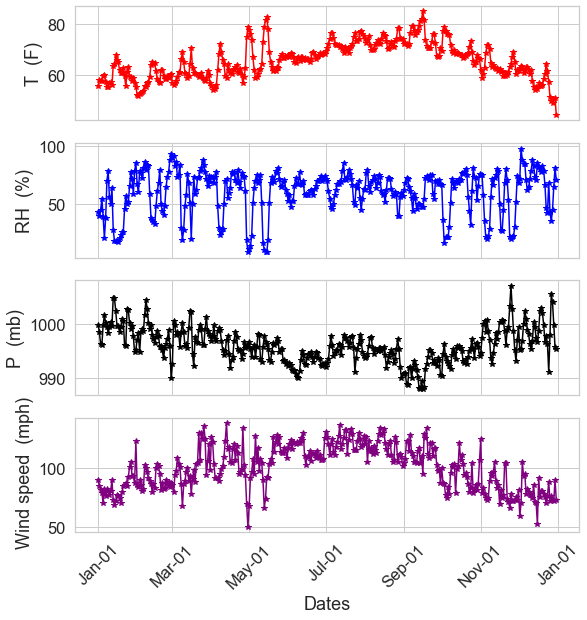

In [44]:
# Create plot space
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4,1, sharex = True, figsize = (10, 10))
fig.subplots_adjust(bottom=0.15, left=0.2)

# Select plot type and add x and y-axis values to the plot

ax1.plot(sd_mean_temp.index.values,
       sd_mean_temp['Arithmetic Mean'], 
       color = "red",
       marker = "*")
ax2.plot(sd_mean_RH.index.values,
       sd_mean_RH['Arithmetic Mean'], 
       color = "blue",
       marker = "*")
ax3.plot(sd_mean_pres.index.values,
       sd_mean_pres['Arithmetic Mean'], 
       color = "black",
       marker = "*")
ax4.plot(sd_mean_wind.index.values,
       sd_mean_wind['Arithmetic Mean'], 
       color = "purple",
       marker = "*")


# Set plot title, axis labels and legends
# ax1.set(#title=
#             "(1a). Daily Mean Temperature (oF)")
ax1.set(#xlabel="Dates", 
       ylabel="T  (F)")
# ax2.set(#title=
#             "(1b). Daily Mean RH (%)")
ax2.set(#xlabel="Dates", 
       ylabel="RH  (%)")
# ax3.set(#title=
#             "(1c). Daily Mean Pressure (mb)")
ax3.set(#xlabel="Dates", 
       ylabel="P  (mb)")
# ax4.set(#title=
#             "(1d). Daily Mean wind speed (mph)")
ax4.set(xlabel="Dates", 
       ylabel=" Wind speed  (mph)")



# Add tick marks and rotate x-axis values
# plt.setp(ax1.get_xticklabels(), rotation=45)
# plt.setp(ax2.get_xticklabels(), rotation=45)
# plt.setp(ax3.get_xticklabels(), rotation=45)
plt.setp(ax4.get_xticklabels(), rotation=45)


# Define the date format
date_form1 = DateFormatter("%b-%d")
ax1.xaxis.set_major_formatter(date_form1)
ax2.xaxis.set_major_formatter(date_form1)
# date_form3 = DateFormatter("%Y")
ax3.xaxis.set_major_formatter(date_form1)
ax4.xaxis.set_major_formatter(date_form1)


# fig.tight_layout()

In [ ]:
sd_county_temp.info()
# check where null values exist
sd_county_temp.isnull().sum()

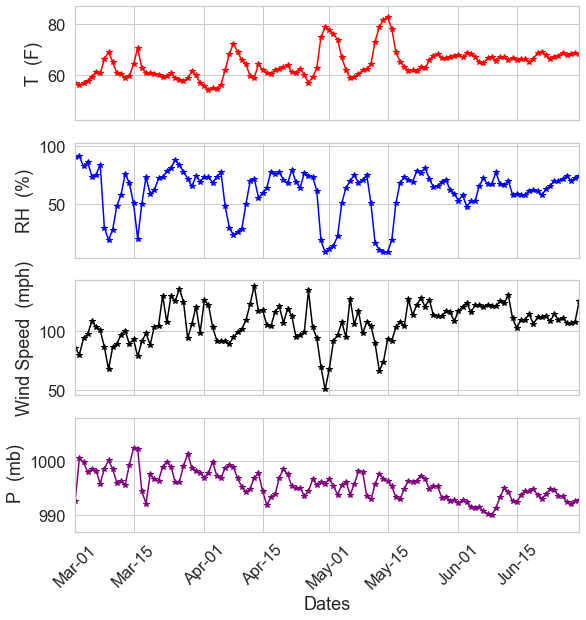

In [48]:
# Create plot space
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4,1, sharex = True, figsize = (10, 10))
fig.subplots_adjust(bottom=0.15, left=0.2)

# Select plot type and add x and y-axis values to the plot

ax1.plot(sd_mean_temp.index.values,
       sd_mean_temp['Arithmetic Mean'], 
       color = "red",
       marker = "*")
ax2.plot(sd_mean_RH.index.values,
       sd_mean_RH['Arithmetic Mean'], 
       color = "blue",
       marker = "*")
ax3.plot(sd_mean_wind.index.values,
       sd_mean_wind['Arithmetic Mean'], 
       color = "black",
       marker = "*")
ax4.plot(sd_mean_pres.index.values,
       sd_mean_pres['Arithmetic Mean'], 
       color = "purple",
       marker = "*")


# Set plot title, axis labels and legends
# ax1.set(#title=
#             "(1a). Daily Mean Temperature (oF)")
ax1.set(#xlabel="Dates", 
       ylabel="T  (F)")
# ax2.set(#title=
#             "(1b). Daily Mean RH (%)")
ax2.set(#xlabel="Dates", 
       ylabel="RH  (%)")
# ax3.set(#title=
#             "(1c). Daily Mean Pressure (mb)")
ax3.set(#xlabel="Dates", 
       ylabel="Wind Speed  (mph)")
# ax4.set(#title=
#             "(1d). Daily Mean wind speed (mph)")
ax4.set(xlabel="Dates", 
       ylabel=" P  (mb)",
       xlim=["2014-03-01", "2014-06-30"])



# Add tick marks and rotate x-axis values
# plt.setp(ax1.get_xticklabels(), rotation=45)
# plt.setp(ax2.get_xticklabels(), rotation=45)
# plt.setp(ax3.get_xticklabels(), rotation=45)
plt.setp(ax4.get_xticklabels(), rotation=45)


# Define the date format
date_form1 = DateFormatter("%b-%d")
ax1.xaxis.set_major_formatter(date_form1)
ax2.xaxis.set_major_formatter(date_form1)
# date_form3 = DateFormatter("%Y")
ax3.xaxis.set_major_formatter(date_form1)
ax4.xaxis.set_major_formatter(date_form1)


# fig.tight_layout()

In [ ]:
# Create figure to show 2013 precipitation pattern using three subsets created from the orignal dataset. 
fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize = (10, 10))
offset = 0.3

# Add x-axis and y-axis
ax1.plot(daily_precip_aug_oct_2013.index.values,
       daily_precip_aug_oct_2013['HPCP'],
       color='green', marker = '*')

ax2.plot(monthly_max_precip_2013.index.values,
       monthly_max_precip_2013['HPCP'],
       color = 'red', marker = 'o')
ax3.plot(mo_total_precip_1948_2013.index.values,
       mo_total_precip_1948_2013['HPCP'],
       color = 'blue')

# Set title and labels for axes
ax1.set(xlabel="Date",
       ylabel="Precipitation (inches)",
       title=" (1a). Daily Total Precipitation (Aug-Oct 2013) in Boulder, CO")

ax2.set(xlabel="Date",
       ylabel="Precipitation (inches)",
       title=" (1b). Monthly maximum of daily precipitation 2013, Boulder, CO")

ax3.set(xlabel="Date",
       ylabel="Precipitation (inches)",
       title=" (1c). Monthly Total Precipitation 1948-2013, Boulder, CO ")

# Rotate tick marks on x-axis
plt.setp(ax1.get_xticklabels(), rotation=45)
plt.setp(ax2.get_xticklabels(), rotation=45)
plt.setp(ax3.get_xticklabels(), rotation=45)

# Define the date format
date_form1 = DateFormatter("%b-%d")
ax1.xaxis.set_major_formatter(date_form1)

date_form2 = DateFormatter("%b-%d")
ax2.xaxis.set_major_formatter(date_form2)

date_form3 = DateFormatter("%Y")
ax3.xaxis.set_major_formatter(date_form3)

plt.tight_layout()
plt.show()

# # Ensure a major tick for each week using (interval=1)
# ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=1)

# Stream Discharge (cubic feet per second - CFS)
## Data selection/analysis for figure 2:
1. one subplot for daily discharge values from Aug 1, 2013 to Oct 1, 2013
    * there should be one value for each day in time period
    * x axis label should be month-day (e.g. "Aug-01")
2. one subplot for monthly maximum values of discharge in 2013
    * there should be one value for each month in 2013
    * x axis label should be month-day (e.g. "Aug-01")
3. one subplot for monthly totals of discharge for all years in dataset
    * there should be one value for each month-year (e.g. Jan 2001, Feb 2001, so on)
    * x axis label should be Year (e.g. "2013")

In [ ]:
# Import discharge data to a data frame.
# The code below parse date, index date and removes missing values.
boulder_daily_discharge_1986_2013= pd.read_csv(file_path2,
                                       parse_dates=['datetime'],
                                       index_col= ['datetime'],
                                       na_values=['999.99'])
boulder_daily_discharge_1986_2013.head()

In [ ]:
# To obtain information on the data type
boulder_daily_discharge_1986_2013.info()

In [ ]:
# To obtain statics on the discharge data
boulder_daily_discharge_1986_2013.describe()

In [ ]:
# To select subset of daily discharge values from Aug 1, 2013 to Oct 1, 2013
daily_dis_aug_oct_2013= (boulder_daily_discharge_1986_2013['2013-08-01':'2013-10-01']
                         .resample('D').sum())
daily_dis_aug_oct_2013

In [ ]:
# To select subset of monthly maximum values of discharge in 2013
monthly_max_dis_2013= (boulder_daily_discharge_1986_2013['2013-01-01':'2013-12-31']
                       .resample('M').max())
monthly_max_dis_2013

In [ ]:
# To select monthly discharge vlaues for all stations for the entire dataset
mo_total_dis_1986_2013= boulder_daily_discharge_1986_2013.resample('M').sum()
mo_total_dis_1986_2013

## A comparison of 2013 and historical discharge of water (CFS) through streams
##           in Boulder, CO.
### Each subplot includes:
* geographic coverage.
* duration or temporal extent of the data.
* what was actually measured and/or represented by the data.
* units of measurement.

In [ ]:
# Create figure and subplot space for discharge in Boulder
fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize = (10, 10))

# Add x-axis and y-axis
ax1.plot(daily_dis_aug_oct_2013.index.values,
       daily_dis_aug_oct_2013['disValue'],
       color='green', marker = '*')
ax2.plot(monthly_max_dis_2013.index.values,
       monthly_max_dis_2013['disValue'],
       color = 'red', marker = 'o')
ax3.plot(mo_total_dis_1986_2013.index.values,
       mo_total_dis_1986_2013['disValue'],
       color = 'blue')

# Set title and labels for axes
ax1.set(xlabel="Date",
       ylabel="Discharge (CFS)",
       title="(2a). Mean daily Total Discharge (CFS) Aug-oct 2013, Boulder, CO.")
ax2.set(xlabel="Date",
       ylabel="Discharge (CFS)",
       title="(2b). Monthly maximum of daily mean discharge (CFS) 2013 Boulder, CO.")
ax3.set(xlabel="Date",
       ylabel="Discharge (CFS)",
       title="(2c). Monthly Total of daily mean discharge (CFS) 1986-2013 Boulder, CO.")

# Rotate tick marks on x-axis
plt.setp(ax1.get_xticklabels(), rotation=45)
plt.setp(ax2.get_xticklabels(), rotation=45)
plt.setp(ax3.get_xticklabels(), rotation=45)

# Define the date format
date_form1 = DateFormatter("%b-%d")
ax1.xaxis.set_major_formatter(date_form1)
ax2.xaxis.set_major_formatter(date_form1)
date_form3 = DateFormatter("%Y")
ax3.xaxis.set_major_formatter(date_form3)

# To adjust proper spacing
plt.tight_layout()
plt.show()

# Results and Discussion on plots
1. Figure. 1a. shows there was an exceptionally higher rainfall on two consecutive days (Sep12-13).
2. Fig 1b-c also indicates higher than usual precipitaton in sep. 2013.
3. Fig 2a-b indicates higher discharge in sep. 2013.
4. It appears from Fig.2c that 1995 and 1997 also experienced similar discharge rates but there was no flooding.
5. I conclude from these figures that higher rainfall on two consecutive days in sep. 2013 caused overflow of water leading to the historic flood in Boulder, Colorado, USA. 
## To prove my conclusion, I have further analyzed data and plotted Fig. 3a-d.
    * Total monthly discharge (26000 CFS) in July 1995, July 1997 was similar to Sep 2013 (Fig. 3a-b).
    * However, it is the monthly maximum discharge which tripled in Sep. 2013 (5000 CFS) compared to 1500 CFS in 1995 and 1997 which caused hostric flood in 2013 in Boulder, Colorado, USA (Fig. 3c-d). 

In [ ]:
# To understand the exceptional nature of 2013 floods in comparison with 1995-1997,
# following subsets were analyzed for further comparison.
# 1. Monthly total discharge in 2013, 1995-1997
monthly_tot_dis_2013= boulder_daily_discharge_1986_2013['2013-01-01':'2013-12-31'].resample('M').sum()

monthly_tot_dis_1995_97= boulder_daily_discharge_1986_2013['1995-01-01':'1997-12-31'].resample('M').sum()

# 2. Monthly maximum discharge in 2013 and 1995-1997
monthly_max_dis_2013= boulder_daily_discharge_1986_2013['2013-01-01':'2013-12-31'].resample('M').max()

monthly_max_dis_1995_97= boulder_daily_discharge_1986_2013['1995-01-01':'1997-12-31'].resample('M').max()

In [ ]:
# Create figure and subplot space for discharge in Boulder
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4,1, figsize = (10, 10))

# Add x-axis and y-axis for plots
ax1.plot(monthly_tot_dis_1995_97.index.values,
         monthly_tot_dis_1995_97['disValue'],
         color='green', marker = "o")
ax2.plot(monthly_tot_dis_2013.index.values,
         monthly_tot_dis_2013['disValue'],
         color='black', marker = "o")
ax3.plot(monthly_max_dis_1995_97.index.values,
       monthly_max_dis_1995_97['disValue'],
       color='blue', marker = "o")
ax4.plot(monthly_max_dis_2013.index.values,
       monthly_max_dis_2013['disValue'],
       color='red', marker = "o")

# Set title and labels for axes
ax1.set(xlabel="Date",
       ylabel="Discharge (CFS)",
       title="(3a). Monthly total Discharge (CFS) 1995-1997, Boulder, CO")
ax2.set(xlabel="Date",
       ylabel="Discharge (CFS)",
       title="(3b). Monthly total Discharge (CFS) 2013, Boulder, CO")
ax3.set(xlabel="Date",
       ylabel="Discharge (CFS)",
       title="(3c). Monthly maximum Discharge (CFS) 1995-1997, Boulder, CO")
ax4.set(xlabel="Date",
       ylabel="Discharge (CFS)",
       title="(3d). Monthly maximum Discharge (CFS) 2013, Boulder, CO")

# Rotate tick marks on x-axis
plt.setp(ax1.get_xticklabels(), rotation=45)
plt.setp(ax2.get_xticklabels(), rotation=45)
plt.setp(ax3.get_xticklabels(), rotation=45)
plt.setp(ax4.get_xticklabels(), rotation=45)

# Define the date format for plotting
date_form1 = DateFormatter("%b-%y")
date_form2 = DateFormatter("%b-%d")
ax1.xaxis.set_major_formatter(date_form1)
ax2.xaxis.set_major_formatter(date_form2)
ax3.xaxis.set_major_formatter(date_form1)
ax4.xaxis.set_major_formatter(date_form2)

plt.tight_layout()
plt.show()